In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)
all_df = clinical_df.join(mouse_df.set_index('Mouse ID'),on='Mouse ID')
all_df
# Combine the data into a single dataset
#mouse_df
#res = len(numb)
#res
# Display the data table for preview
#clinical_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin
1889,u364,45,31.023923,3,Capomulin
1890,p438,45,61.433892,1,Ceftamin
1891,x773,45,58.634971,4,Placebo


In [2]:
w_df = all_df.copy()
w_df.set_index('Drug')
w_df=w_df.drop(['Mouse ID','Metastatic Sites'],axis=1)

w_df_grp = w_df.groupby(['Drug','Timepoint'])


# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
vol_mean = w_df_grp['Tumor Volume (mm3)'].mean()


# Convert to DataFrame

df = pd.DataFrame(vol_mean)

response_summary = pd.DataFrame({'Tumor Volume mm3' : w_df_grp['Tumor Volume (mm3)'].mean()})

# remove the index setting so that it will display in desired framework.
new_summary = response_summary.reset_index()
new_summary.head(5)
#w_df.head(20)
#vol_sem


,Drug,Timepoint,Tumor Volume mm3
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
vol_sem = w_df_grp['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
vol_sem_summary_pre = pd.DataFrame({'Tumor Volume SEM' : vol_sem})
vol_sem_summary = vol_sem_summary_pre.reset_index()

# Preview DataFrame
vol_sem_summary.head(5)

,Drug,Timepoint,Tumor Volume SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [ ]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
summary_need_transpose = new_summary.copy()
error_need_tran = vol_sem_summary.copy()

summary_transpose = summary_need_transpose.pivot(index='Timepoint', columns='Drug')
error_transpose = error_need_tran.pivot(index='Timepoint', columns='Drug')
# Preview that Reformatting worked
summary_transpose.head(5)
#error_transpose.head(10)

Tumor Volume mm3                                              \
Drug             Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                
0                45.000000  45.000000  45.000000  45.000000  45.000000   
5                44.266086  46.503051  47.062001  47.389175  46.796098   
10               43.084291  48.285125  49.403909  49.582269  48.694210   
15               42.064317  50.094055  51.296397  52.399974  50.933018   
20               40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


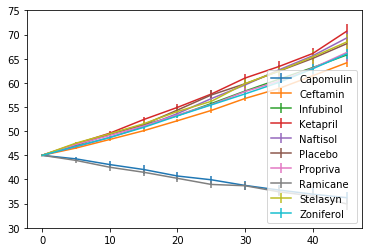

45

In [5]:
# Generate the Plot (with Error Bars)
ax = plt.gca()
x_limit = 45
x_axis = np.arange(0,x_limit,5)

# Save the Figure

drug_names = []
[drug_names.append(drug) for drug in summary_transpose['Tumor Volume mm3']]
# Use index of first drug to get x scale values.
x_limits = summary_transpose['Tumor Volume mm3'][drug_names[0]].keys()
#thedays
#drug_names
max_y_val = 0
min_y_val = 10
for drug in drug_names:
    temp_max = summary_transpose['Tumor Volume mm3'][drug].max()
    temp_min = summary_transpose['Tumor Volume mm3'][drug].min()
    plt.errorbar(x_limits, summary_transpose['Tumor Volume mm3'][drug],yerr=error_transpose['Tumor Volume SEM'][drug],label=drug)
    if temp_max > max_y_val:
        max_y_val = int(temp_max)
    if temp_min > min_y_val:
        min_y_val = int(temp_min)
    
plt.ylim(min_y_val - 15, max_y_val + 5)


#plt.errorbar(x_limits, summary_transpose['Tumor Volume mm3'][drug_names[0]],yerr=error_transpose['Tumor Volume SEM'][drug_names[0]],label=drug_names[0])
#plt.errorbar(x_limits, summary_transpose['Tumor Volume mm3'][drug_names[1]],yerr=error_transpose['Tumor Volume SEM'][drug_names[1]],label=drug_names[1])
plt.legend(loc='best')
plt.show()
min_y_val

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_site = all_df.copy()
meta_site = meta_site.set_index('Drug')
meta_site = meta_site.drop(['Mouse ID','Tumor Volume (mm3)'],axis=1)
meta_site_grp = meta_site.groupby(['Timepoint','Drug'])
# Convert to DataFrame
meta_mean = meta_site_grp['Metastatic Sites'].mean()
meta_site_grp.head(5)
meta_pre_summ = pd.DataFrame({'meta_mean' : meta_mean})

meta_summary = meta_pre_summ.reset_index()
# Preview DataFrame
meta_summary.head()

,Timepoint,Drug,meta_mean
0,0,Capomulin,0.0
1,0,Ceftamin,0.0
2,0,Infubinol,0.0
3,0,Ketapril,0.0
4,0,Naftisol,0.0


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = meta_site_grp['Metastatic Sites'].sem()

# Convert to DataFrame
meta_sem_summary_pre = pd.DataFrame({'meta_site_sem' : meta_sem})
meta_sem_summary = meta_sem_summary_pre.reset_index()
# Preview DataFrame
meta_sem_summary.head(5)

,Timepoint,Drug,meta_site_sem
0,0,Capomulin,0.0
1,0,Ceftamin,0.0
2,0,Infubinol,0.0
3,0,Ketapril,0.0
4,0,Naftisol,0.0


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
meta_summary_need_transpose = meta_summary.copy()
meta_error_need_tran = meta_sem_summary.copy()

meta_summary_transpose = meta_summary_need_transpose.pivot(index='Timepoint', columns='Drug')
meta_error_transpose = meta_error_need_tran.pivot(index='Timepoint', columns='Drug')
# Preview that Reformatting worked
meta_error_transpose.head(5)

meta_site_sem                                                    \
Drug          Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                   
0              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5              0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10             0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15             0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20             0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


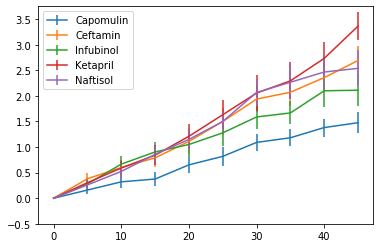

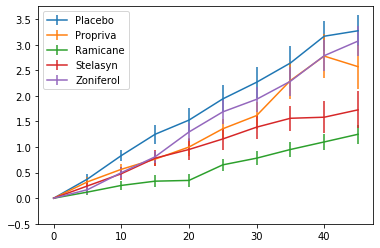

In [9]:
# Generate the Plot (with Error Bars)
# ******************** Scaling ***********************************************************
ax = plt.gca()
x_limit = 45
x_axis = np.arange(0,x_limit,5)

x_limits = meta_summary_transpose['meta_mean'][drug_names[0]].keys()
#thedays
#drug_names
max_y_val = 0
min_y_val = 10
for drug in drug_names:
    temp_max = meta_summary_transpose['meta_mean'][drug].max()
    temp_min = meta_summary_transpose['meta_mean'][drug].min()
    if temp_max > max_y_val:
        max_y_val = int(temp_max)
    if temp_min > min_y_val:
        min_y_val = int(temp_min)

for i in range(0,5,1):
    plt.errorbar(x_limits, meta_summary_transpose['meta_mean'][drug_names[i]],
                 yerr=meta_error_transpose['meta_site_sem'][drug_names[i]],label=drug_names[i])

plt.ylim(min_y_val - 10.5, max_y_val + 0.75)
plt.legend(loc='best')

fname = "output/meta_site_1.png"
plt.savefig(fname)
plt.show()

for i in range(0,5,1):
    plt.errorbar(x_limits, meta_summary_transpose['meta_mean'][drug_names[i+5]],
                 yerr=meta_error_transpose['meta_site_sem'][drug_names[i+5]],label=drug_names[i+5])

plt.ylim(min_y_val - 10.5, max_y_val + 0.75)
plt.legend(loc='best')

fname = "output/meta_site_2.png"
plt.savefig(fname)
plt.show()

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_df = all_df.copy()
mice_df.set_index('Drug')
mice_df = mice_df.drop(['Tumor Volume (mm3)','Metastatic Sites'],axis=1)
mice_df_grp = mice_df.groupby(['Timepoint','Drug'])
#mice_count = mice_df_grp['Mouse ID'].nunique()
# Convert to DataFrame
mouse_df = pd.DataFrame({'Mouse Count' : mice_df_grp['Mouse ID'].nunique()})
# Preview DataFrame
mouse_df = mouse_df.reset_index()
mouse_df.head(5)

,Timepoint,Drug,Mouse Count
0,0,Capomulin,25
1,0,Ceftamin,25
2,0,Infubinol,25
3,0,Ketapril,25
4,0,Naftisol,25


In [11]:
mouse_transpose = mouse_df.copy()
mouse_transpose = mouse_transpose.pivot(index='Timepoint', columns='Drug')
mouse_transpose['Mouse Count'].head(5)
#mouse_percent = mouse_transpose['Mouse Count'] / mouse_transpose['Mouse Count'][drug_names[0]][0] * 100
#mouse_percent

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


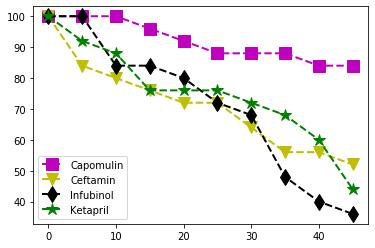

In [12]:
# Convert to % survival rate.
mouse_percent = mouse_transpose['Mouse Count'] / mouse_transpose['Mouse Count'][drug_names[0]][0] * 100
# reusing the lists: ** x_limits and drug_names **

markers = ['s','v','d','*']
colors = ['m','y','k','g']

for i in range(0,4,1):    
    plt.plot(x_limits, mouse_percent[drug_names[i]], color=colors[i], marker=markers[i], linestyle='dashed',
        linewidth=2, markersize=12,label=drug_names[i])
    

plt.legend(loc='best')

fname = "output/survive_1.png"
plt.savefig(fname)
plt.show()
#'m'	magenta
#'y'	yellow
#'k'	black
#'g'	green
#mouse_percent.head(5)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

In [20]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_spread = all_df.copy()
meta_spread = meta_spread.set_index('Drug')
meta_spread = meta_spread.drop(['Mouse ID','Tumor Volume (mm3)'],axis=1)
#meta_spread_grp = meta_spread.groupby(['Timepoint','Drug'])
# Convert to DataFrame
#meta_spread_sum = meta_spread_grp['Metastatic Sites']
#meta_spread_grp.head(5)
#meta_pre_summ = pd.DataFrame({'meta_mean' : meta_mean})

meta_spread_need_t = pd.DataFrame(meta_spread_grp)
# Preview DataFrame
meta_spread_transpose = meta_spread.pivot(index='Timepoint')
#meta_spread_transpose.head(5)
meta_spread_transpose.head(5)

KeyError: 'None of [None] are in the columns'

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)